In [91]:
# Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [92]:
#Defines Global Variables data entries
TOTAL_DATA = 150

# Splits data into training(80%) and testing(20%)
TRAINING_DATA = int(TOTAL_DATA*0.8) 
TESTING_DATA = int(TOTAL_DATA*0.2)

# Number of input features
FEATURE_NUMBER = 4

# Number of classes and respective indexing
CLASS_NUMBER = 3
CLASSNAMES = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [93]:
# Read in data
data = pd.read_csv('../DataSets/Iris.csv')

#Splits into 2 classes instead of 3
#data = data[0:100]

# Shuffle data
data = data.sample(frac = 1)

data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,35,4.9,3.1,1.5,0.1,Iris-setosa
10,11,5.4,3.7,1.5,0.2,Iris-setosa
37,38,4.9,3.1,1.5,0.1,Iris-setosa
137,138,6.4,3.1,5.5,1.8,Iris-virginica
32,33,5.2,4.1,1.5,0.1,Iris-setosa


In [94]:
# Pulling feature data and splicing it for training/testing using 80-20 ratio
x_train = data.iloc[:TRAINING_DATA, 1:FEATURE_NUMBER+1].values
x_test = data.iloc[TRAINING_DATA:, 1:FEATURE_NUMBER+1].values

# Standardizes the data by dividing the entries by standard deviation (i.e calculating how many standard deviations the entries are from the center)
x_train = (x_train - np.mean(x_train, axis=0)) / np.std(x_train, axis=0)
x_test = (x_test - np.mean(x_test, axis=0)) / np.std(x_test, axis=0)

# Reshape for matrix multiplication
x_train = x_train.reshape(FEATURE_NUMBER, TRAINING_DATA)
x_test = x_test.reshape(FEATURE_NUMBER, TESTING_DATA)



In [95]:
# Pulling label data and splicing it for training/testing using 80-20 ratio
y_train_data = data.iloc[:TRAINING_DATA, -1].values
y_test_data = data.iloc[TRAINING_DATA:, -1].values

# Create vectorized representations of each data point's class membership
y_train = np.zeros(shape=(CLASS_NUMBER, TRAINING_DATA))
y_test = np.zeros(shape=(CLASS_NUMBER, TESTING_DATA))

# Setting numeric labels for each data point's class
for row in range(CLASS_NUMBER):
    y_train[row, :TRAINING_DATA]  = [ele == CLASSNAMES[row] for ele in y_train_data]
    y_test[row, :TESTING_DATA] = [ele == CLASSNAMES[row] for ele in y_test_data]

In [96]:
# Randomly initialize weights and bias matricies
w = np.random.rand(CLASS_NUMBER, FEATURE_NUMBER)
b = np.random.rand(CLASS_NUMBER, 1)



In [97]:
#Class coresspondance function, returns a vector (z), which will be input into softmax function
#The highest number in z represents the correct class
def class_corr(weights, bias, x):
    
    numData = x.shape[1]
    #print(numData)
    z = weights.dot(x)
    #print(z)
    for input in range(numData):
        z[0:CLASS_NUMBER, input:input+1] += bias

    return z

z = class_corr(w, b, x_test)
print(z)



[[-0.71098038 -0.41916405 -0.03215328  1.2938399  -0.25493217 -0.79155214
   0.02370285  2.03872263 -1.51856889  0.29658425 -1.92422808 -0.13278385
   0.68895544 -1.28538487  1.49520984 -1.05075786 -0.26747034  0.1065342
  -1.85494732 -2.72977243 -1.04498493 -1.95206338  1.89234901  0.78126855
   1.17402465  2.04195522  2.2679032   2.17417936  1.13263425  0.85451302]
 [ 0.10115971  0.11961546  0.20853857  0.1504607  -0.16952523 -0.0725307
  -0.16548592  0.21758542 -0.42198386 -0.4551071  -0.1606728  -0.53423684
   0.49207521 -0.28032843  0.35597225  0.06235503 -1.13983817  0.26294043
  -1.36700923 -2.33290732 -0.67334543 -0.89440943  0.90229954 -0.56509229
   0.22557775  1.54554152 -0.45732473 -0.58453869 -0.05876645  1.24618361]
 [-0.41790911 -0.22002225 -0.04922659  1.17265724 -0.29536632 -0.54668673
   0.11969945  2.12190511 -0.88771882 -0.18908918 -0.78454574  1.18648235
   0.39878662 -0.61512488  1.52861791 -0.71950954  0.12135829  0.82051389
  -1.61017695 -2.2327656  -0.82385117 

In [98]:
#Softmax Function
#expnentiates all elements of the z vector and divides by their sum to see class probability
def softmax(z):

    #creates empty probability array
    y_hat = np.empty([z.shape[0], z.shape[1]])
    numData = z.shape[1]

    #exponentiates the matrix
    z_exp = np.exp(z)

    #Converts z vector into probability distribution
    for input in range(numData):
        z_sum = np.sum(z_exp[0:CLASS_NUMBER, input:input+1])
        y_hat[0:CLASS_NUMBER, input:input+1] = z_exp[0:CLASS_NUMBER, input:input+1]/z_sum
    return y_hat


y_pred = softmax(z)
print(softmax(z))


[[0.21771019 0.25417684 0.30720073 0.45359451 0.3279191  0.23095365
  0.34148509 0.44472478 0.17026691 0.4791909  0.10041255 0.18484212
  0.38919195 0.1758456  0.42480246 0.18394105 0.34563656 0.23745055
  0.2559979  0.24207512 0.27044566 0.16635939 0.40110765 0.40872641
  0.38472817 0.33493898 0.43226195 0.48625315 0.34994046 0.2036456 ]
 [0.49044095 0.43563719 0.39079895 0.14457876 0.35715644 0.47401476
  0.28262339 0.07197497 0.50976626 0.22597123 0.58572037 0.12372348
  0.31963906 0.480421   0.13596353 0.55988322 0.14446251 0.27765119
  0.41700881 0.36000331 0.392176   0.47904971 0.14903488 0.10634464
  0.14902143 0.20388063 0.02832667 0.0308153  0.10631032 0.30128354]
 [0.29184886 0.31018598 0.30200032 0.40182673 0.31492446 0.29503159
  0.37589152 0.48330025 0.31996683 0.29483787 0.31386707 0.6914344
  0.29116899 0.3437334  0.43923401 0.25617573 0.50990093 0.48489825
  0.32699328 0.39792157 0.33737834 0.3545909  0.44985747 0.48492895
  0.4662504  0.46118039 0.53941137 0.48293155 0

In [99]:
#Loss function
#Returns the sum of all probabilities compared to the actual class
def cost(y, y_pred):

    total_loss = 0

    #Finds number of data samples
    numData = y.shape[1]

    #Manipulates y_pred into right form for the loss function
    y_pred = -1*np.log(y_pred)

    #iterates over all data samples
    for column in range(numData):

        #Computes total class loss for each data sample and sums them
        y_cur = y[0:CLASS_NUMBER, column:column+1].transpose()
        y_pred_cur = (y_pred[0:CLASS_NUMBER, column:column+1])
        total_loss += y_cur.dot(y_pred_cur)[0][0]

    #Divdes by number of data samples to find average error
    total_loss = total_loss/numData
    return total_loss
    
    

        



cost(y_test, y_pred)

1.1875461420244298

In [100]:
# Take the gradients of the loss with respect to weights and bias
def findGradients(x, y, y_pred):
    # Number of data samples
    numData = x.shape[1]

    # Calculate error for gradient computations
    error = y_pred - y
    error = error.transpose()
    

    # Dictionary for holding gradient values
    gradientDict = dict()
    gradientDict['gradWeights'] = np.array((1/numData) * x.dot(error))
    gradientDict['gradBias'] =  ((1/numData) * error.sum(axis=0)).reshape(1, CLASS_NUMBER)
    
    
    return gradientDict
y_pred = softmax(z)
findGradients(x_test, y_test, y_pred)

{'gradWeights': array([[ 0.06016672, -0.00482918, -0.05533754],
        [ 0.00074941,  0.11968601, -0.12043542],
        [ 0.04378018, -0.03940134, -0.00437884],
        [-0.0471684 , -0.23717423,  0.28434263]]),
 'gradBias': array([[ 0.0401942 , -0.00887725, -0.03131695]])}

In [101]:
# Repetitively perform gradient descent to improve model 
def gradientDescent(x, y, weights, bias, losses, max_iter, learning_rate):
    for i in range(max_iter): 
        z = class_corr(weights, bias, x)
        #print(z.shape)
        y_pred = softmax(z)
        gradients = findGradients(x, y, y_pred)


        # Compute gradient descent
        weights = weights - ((learning_rate * gradients["gradWeights"]).transpose())
        bias = bias - ((learning_rate * gradients["gradBias"].transpose()))
       

        # Not required - meant to visualize model's performance
        loss = cost(y, y_pred)
        losses.append(loss)

        learning_rate *= 0.9

    return weights, bias


In [102]:
# List for storing log loss over time
losses = []

w, b = gradientDescent(x_train, y_train, w, b, losses, max_iter=100, learning_rate=0.1)

#print(w)
#print(b)

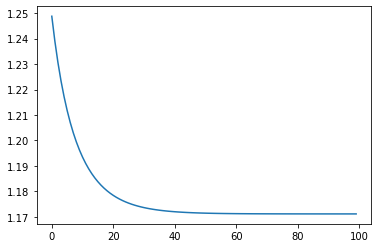

In [103]:
plt.plot(losses)

In [104]:
# Calculates accuracy of test data
def accuracy(y, y_pred):
    #correctness = dict()
    #for class in CLASSNAMES:
    #    gradientDict[class] = 0

    total_correct = 0
    numData = y.shape[1]
    
    # Iterating through all of data
    for data in range(numData):
        # Returns array for index of max probabilities for each data point 
        y_indexes = np.argmax(y, axis=0)
        y_pred_indexes = np.argmax(y_pred, axis=0)

        total_correct = np.sum(y_indexes == y_pred_indexes)
        
    total_accuracy = total_correct/numData
    return total_accuracy


In [105]:
# Accuracy check
z = class_corr(w, b, x_test)
y_pred = softmax(z)

model_acc = accuracy(y_test, y_pred)
model_acc

0.3333333333333333

In [ ]:
# Test Comparisons
print()

print(pred_pos)
print(pred_neg)

print(real_pos)
print(real_neg)